# Building a Stock Price Prediction Model with KNN
> A tutorial showing how to build a stock price prediction model with the use of the K-Nearset Neighbor Model 
- toc: true  
- badges: true
- comments: true
- categories: [KNN, AAPL, scikit-learn]
- images: images/SPPwKNN.jpeg

# Importing dependecies and Apple dataset

In [ ]:
import pandas as pd
from datetime import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

start_date = "2010-01-01"
today = datetime.today().strftime("%Y-%m-%d")

df = web.DataReader("AAPL", 'yahoo', start = start_date, end = today)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-23,132.429993,130.779999,132.160004,130.960007,88223700.0,130.960007
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,131.970001
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,136.690002
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,134.869995
2020-12-30,135.990005,133.399994,135.580002,133.720001,96292700.0,133.720001


# Calculating the Moving Average

In [ ]:
df["M.Avg"]= df["Adj Close"].rolling(window=100).mean()
df.tail()

,High,Low,Open,Close,Volume,Adj Close,M.Avg
Date,,,,,,,
2020-12-23,132.429993,130.779999,132.160004,130.960007,88223700.0,130.960007,117.860380
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,131.970001,118.087289
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,136.690002,118.357437
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,134.869995,118.571120
2020-12-30,135.990005,133.399994,135.580002,133.720001,96292700.0,133.720001,118.799109


# Visualizing the data price & M.avg

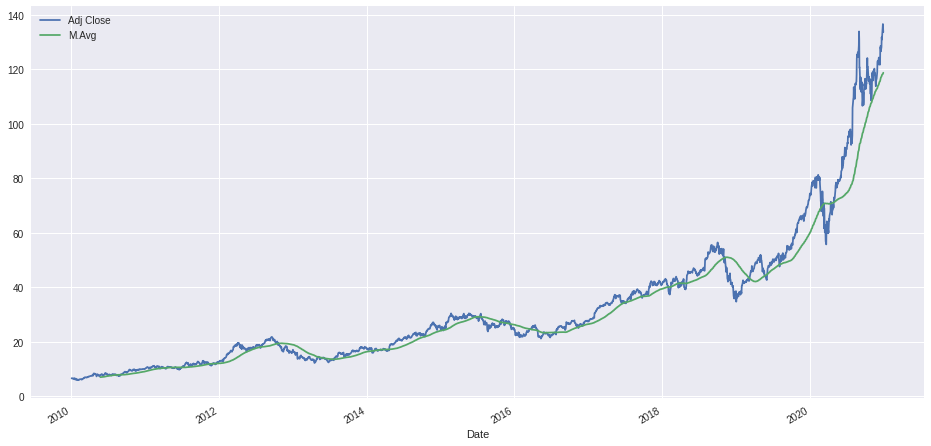

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")

import matplotlib as mpl
mpl.rc('figure', figsize=(16, 8))

df[["Adj Close","M.Avg"]].plot()
plt.show()

# Calculating & Visualizing the Daily Returns

In [ ]:
returns = df["Adj Close"].pct_change()
returns= pd.DataFrame(returns)
returns

,Adj Close
Date,
2010-01-04,NaN
2010-01-05,0.001729
2010-01-06,-0.015906
2010-01-07,-0.001849
2010-01-08,0.006648
...,...
2020-12-23,-0.006976
2020-12-24,0.007712
2020-12-28,0.035766


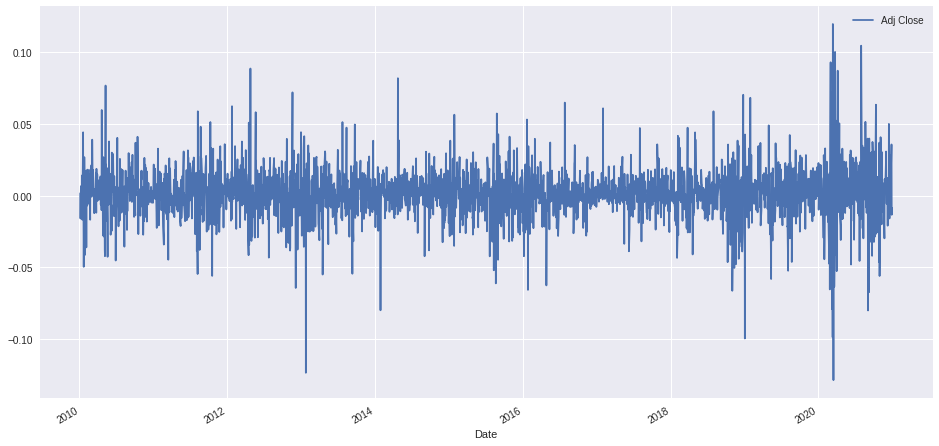

In [ ]:
returns.plot()

# Bulding the portfolio

In [ ]:
dfcomp = web.DataReader(['AAPL','AMZN','NFLX','GOOG','MSFT','FB'], 'yahoo', start = start_date, end = today)["Adj Close"]
dfcomp

Symbols,AAPL,AMZN,NFLX,GOOG,MSFT,FB
Date,,,,,,
2010-01-04,6.593426,133.899994,7.640000,312.204773,24.105360,NaN
2010-01-05,6.604825,134.690002,7.358572,310.829926,24.113148,NaN
2010-01-06,6.499768,132.250000,7.617143,302.994293,23.965164,NaN
2010-01-07,6.487752,130.000000,7.485714,295.940735,23.715933,NaN
2010-01-08,6.530883,133.520004,7.614286,299.885956,23.879499,NaN
...,...,...,...,...,...,...
2020-12-23,130.960007,3185.270020,514.479980,1732.380005,221.020004,268.109985
2020-12-24,131.970001,3172.689941,513.969971,1738.849976,222.750000,267.399994
2020-12-28,136.690002,3283.959961,519.119995,1776.089966,224.960007,277.000000


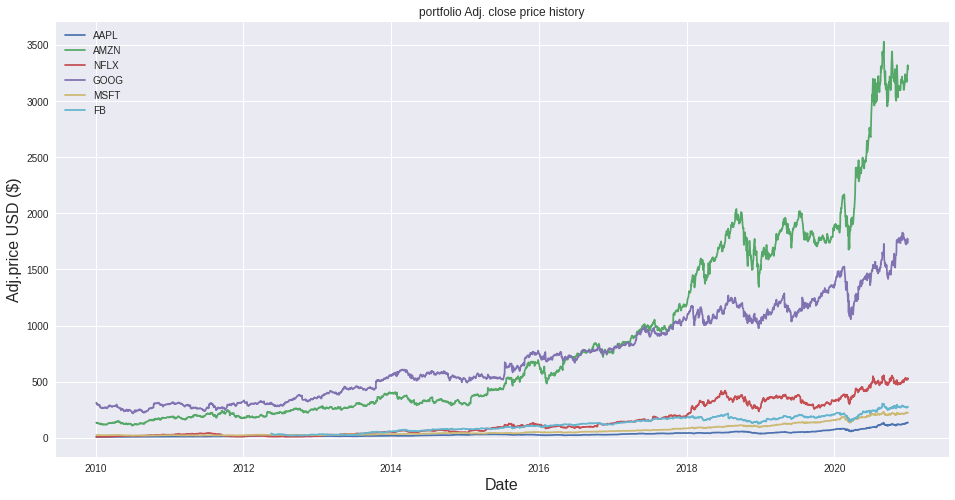

In [ ]:
#visualy show the stock portfolio
title = 'portfolio Adj. close price history'

#Create and plot the graph
for c in dfcomp.columns.values:
  plt.plot(dfcomp[c], label = c)
#plt.plot(dfcomp[["AAPL","AMZN","NFLX","FB","MSFT"]])

plt.title(title)
plt.xlabel("Date", fontsize= 16)
plt.ylabel("Adj.price USD ($)", fontsize= 16)
plt.legend(dfcomp.columns.values, loc='upper left')
plt.show()

# Calculating the portfolio correlation

In [ ]:
pfrets = dfcomp.pct_change()
pfcorr = pfrets.corr()
pfcorr

Symbols,AAPL,AMZN,NFLX,GOOG,MSFT,FB
Symbols,,,,,,
AAPL,1.000000,0.448198,0.251906,0.527316,0.556531,0.393691
AMZN,0.448198,1.000000,0.412491,0.575691,0.529254,0.451393
NFLX,0.251906,0.412491,1.000000,0.330493,0.303393,0.286692
GOOG,0.527316,0.575691,0.330493,1.000000,0.611136,0.495600
MSFT,0.556531,0.529254,0.303393,0.611136,1.000000,0.415975
FB,0.393691,0.451393,0.286692,0.495600,0.415975,1.000000


Text(0, 0.5, 'Returns NFLX')

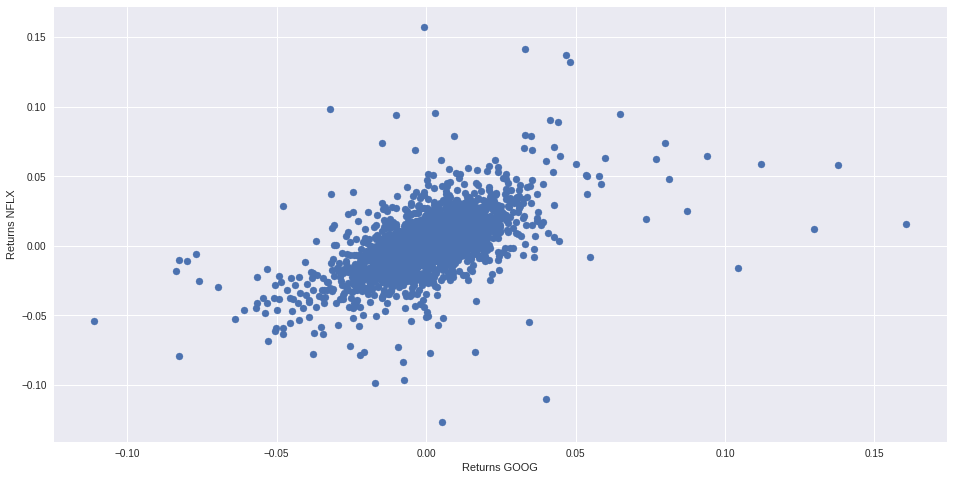

In [ ]:
plt.scatter(pfrets.GOOG, pfrets.AMZN)
plt.xlabel('Returns GOOG')
plt.ylabel('Returns NFLX')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f03948f6630>,
      dtype=object)

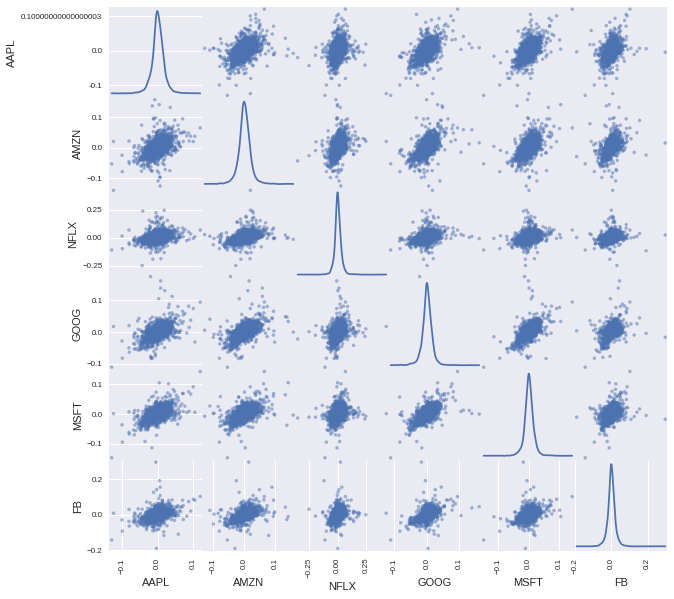

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(pfrets, diagonal='kde', figsize=(10, 10))

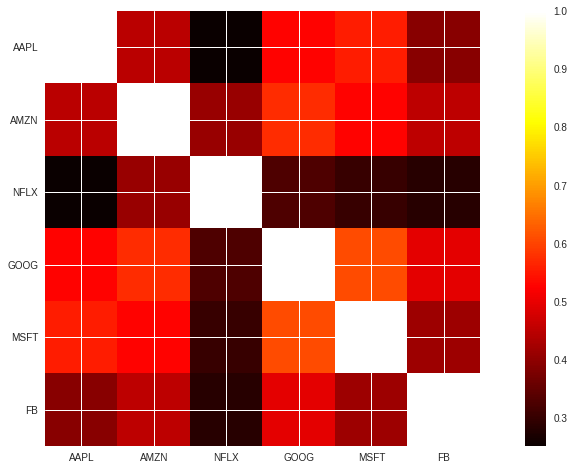

In [ ]:
plt.imshow(pfcorr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(pfcorr)), pfcorr.columns)
plt.yticks(range(len(pfcorr)), pfcorr.columns);

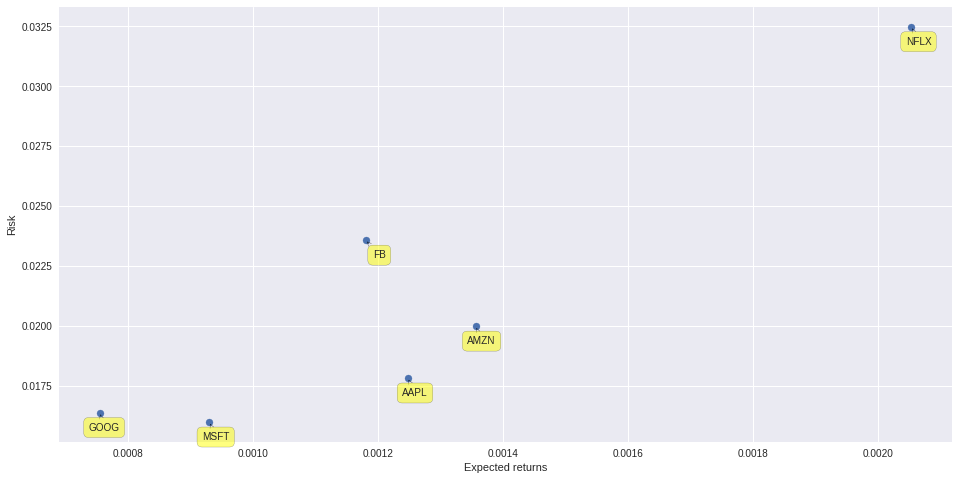

In [ ]:
plt.scatter(pfrets.mean(), pfrets.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(pfrets.columns, pfrets.mean(), pfrets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

# Predicting Stocks Price
Feature Engineering


In [ ]:
dfreg = df[['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
dfreg

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2010-01-04,6.593426,493729600.0,0.990606,0.271752
2010-01-05,6.604825,601904800.0,1.091520,-0.102519
2010-01-06,6.499768,552160000.0,2.123523,-1.590633
2010-01-07,6.487752,477131200.0,1.400893,-0.552538
2010-01-08,6.530883,447610800.0,1.386924,0.798864
...,...,...,...,...
2020-12-23,130.960007,88223700.0,1.259922,-0.907988
2020-12-24,131.970001,54930100.0,1.788286,0.494969
2020-12-28,136.690002,124486200.0,2.801962,2.015073


# Pre-processing & Cross Validation
We will clean up and process the data using the following steps before putting them into the prediction models:


*   Drop missing value
*   Separating the label here, we want to predict the AdjClose
*   Scale the X so that everyone can have the same distribution for linear regression
*   Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
Separate label and identify it as y
* Separation of training and testing of model by cross validation train test split  




In [ ]:
#Import math and numpy for cleaning  the data
import numpy as np
import math
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
#Drop missing value 
dfreg.fillna(value= -99999, inplace=True)

#Create a variable for predicting 'n' days out into the future
forecast_out = int(math.ceil(len(dfreg)* 0.01))

#Create another column (the target or the dependent variable) shifted 'n' units up
dfreg['Prediction']= df[['Adj Close']].shift(-forecast_out)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Create the independent data set (X) and Convert the new dataframe to a numpy array
X = np.array(dfreg.drop(['Prediction'],1))

In [ ]:
# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [ ]:
X = X [:-forecast_out]
X

array([[-1.02057093,  0.90509935, -0.78641583,  0.18451687],
       [-1.02011453,  1.37688182, -0.70432877, -0.0910894 ],
       [-1.02432078,  1.15993076,  0.13513761, -1.18691057],
       ...,
       [ 3.53198167, -0.85051957,  0.32811589,  0.83893735],
       [ 3.4955472 , -0.92427756, -0.42714281, -0.11415263],
       [ 3.44109587, -0.91533213, -0.33790859, -0.37568687]])

In [ ]:
#Set x_forecast equal to the last 30 rows of the original data set from the Adj. Close column
x_forecast = X[-forecast_out:]
x_forecast

array([[ 3.68755825, -0.20049764,  2.26571997,  2.64632548],
       [ 3.55566121, -0.10409719,  2.26337423, -2.46687302],
       [ 3.55925835, -0.5893691 ,  0.69660037,  0.10003536],
       [ 3.5400734 , -0.75729195,  0.46310651,  1.21873625],
       [ 3.47252593, -0.74492946,  0.28043004, -1.38781467],
       [ 3.35102107, -0.72205236,  1.74624838, -2.45874384],
       [ 3.41217335, -0.70554753,  0.72675126,  0.81458001],
       [ 3.38659352, -0.85591447, -0.01921017,  0.11063985],
       [ 3.34182814, -0.80339592,  0.83228552, -1.08145273],
       [ 3.31345057, -0.88807194,  0.01288473, -0.86972085],
       [ 3.31385012, -0.76038192,  1.00258356,  0.65613284],
       [ 3.3758015 , -0.8457492 ,  0.31929076,  0.6921576 ],
       [ 3.15997008, -0.62044105,  1.57521214, -2.47980977],
       [ 3.32464154, -0.61088374,  1.74420026,  1.91759423],
       [ 3.06644355, -0.41836196,  1.59845966, -1.47430301],
       [ 3.0628461 , -0.71233717,  0.9205612 , -0.24506488],
       [ 3.12959417, -0.

In [ ]:
#Create the dependant data set(y) and convert the data frame to an numpy array (All the data including the NaN's)
y = np.array(dfreg['Prediction'])[:-forecast_out]
y

array([  6.17349958,   6.26654387,   6.24035645, ..., 136.69000244,
       134.86999512, 133.72000122])

In [ ]:
#Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#### K Nearest Neighbor (KNN)
This KNN uses feature similarity to predict values of data points. This ensures that the new point assigned is similar to the points in the data set. To find out similarity, we will extract the points to release the minimum distance (e.g: Euclidean Distance).

In [ ]:
# Generate the Model using the KNN
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

### Evaluation
A simple quick and dirty way to evaluate is to use the score method in each trained model. The score method finds the mean accuracy of self.predict(X) with y of the test data set.

In [ ]:
confidenceknn = clfknn.score(X_test, y_test)
print("The KNN regression confidence is: ", confidenceknn)

The KNN regression confidence is:  0.9531964601858879


#### Predicting the Stock Prices 

In [ ]:
#Print the forecasting 
forecast_set = clfknn.predict(x_forecast)
#Create an empty column for the forecast result

print(forecast_set)

[117.61442947 114.1742363  121.0399971  123.52500153 115.4559021
 119.61592484 125.06499863 120.77249908 118.98090363 115.73831177
 125.06499863 119.65032196 119.61592484 118.26601028 117.05093765
 120.95000076 119.65032196 121.71532059 119.65032196 114.7003212
 112.96133041 121.89031982 123.52500153 132.34000397 131.46500397
 119.45999908 131.46500397 132.34000397]


#### Plotting the Prediction 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


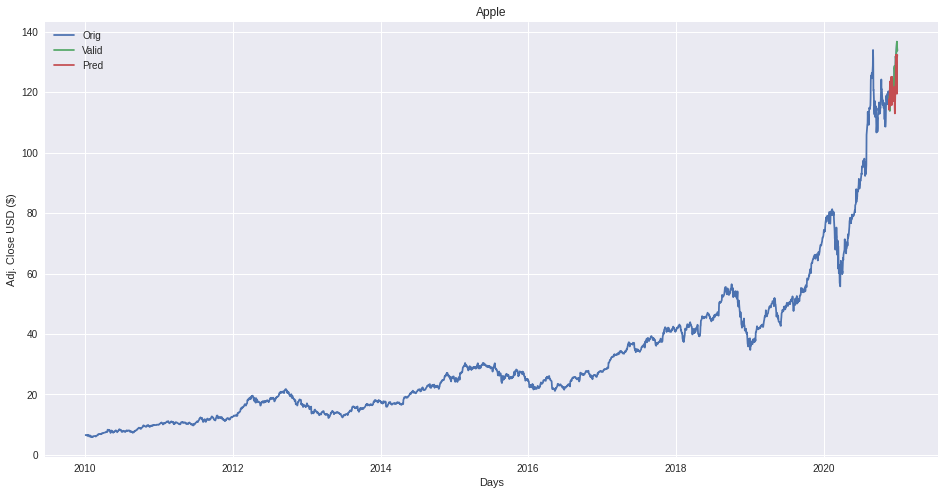

In [ ]:
#Visualize the data
predictions = forecast_set

valid = df[X.shape[0]:]
valid["Prediction"] = predictions
plt.figure(figsize=(16,8))
plt.title("Apple")
plt.xlabel("Days")
plt.ylabel("Adj. Close USD ($)")
plt.plot(df["Adj Close"])
plt.plot(valid[["Adj Close","Prediction"]])
plt.legend(["Orig","Valid","Pred"])
plt.show()